In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve,precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv(r"C:\Users\91876\Desktop\Python\Flask folder\Flask5\StudentsPerformance[1].csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns.values

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'], dtype=object)

In [10]:
df['Total score']=df['reading score'] + df['writing score']

In [11]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [12]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [16]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [17]:
df['reading score'].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [18]:
df['writing score'].unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

In [19]:
df['Total score'].unique()

array([146, 178, 188, 101, 153, 161, 187,  82, 131, 110, 106,  95, 154,
       142, 111, 175,  60,  88, 119, 132, 145, 107, 151, 109, 144, 135,
       148, 126, 137,  80, 169, 160, 164, 123, 113, 115, 141, 127, 147,
       150, 166, 103,  86, 171,  84, 104, 117,  27,  73, 116, 125,  74,
       114, 121, 136, 118,  99,  90,  79,  48, 159, 162, 168,  70, 163,
       128, 129, 134, 180,  91, 176, 139, 200, 100, 112, 167, 124, 181,
       186, 156,  77, 165, 133, 130, 143,  72, 193,  96, 177, 152, 120,
       173, 105, 102, 183,  97, 108, 155, 170, 158,  83, 149, 157,  55,
       122, 172, 174,  81, 189,  85,  94, 138,  98, 140, 185,  92,  89,
       184,  42,  65, 179,  66, 195, 199,  69,  93, 191, 182, 197,  39,
        59, 196,  76,  87,  67,  56,  47, 194], dtype=int64)

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,146
1,female,group C,some college,standard,completed,69,90,88,178
2,female,group B,master's degree,standard,none,90,95,93,188
3,male,group A,associate's degree,free/reduced,none,47,57,44,101
4,male,group C,some college,standard,none,76,78,75,153


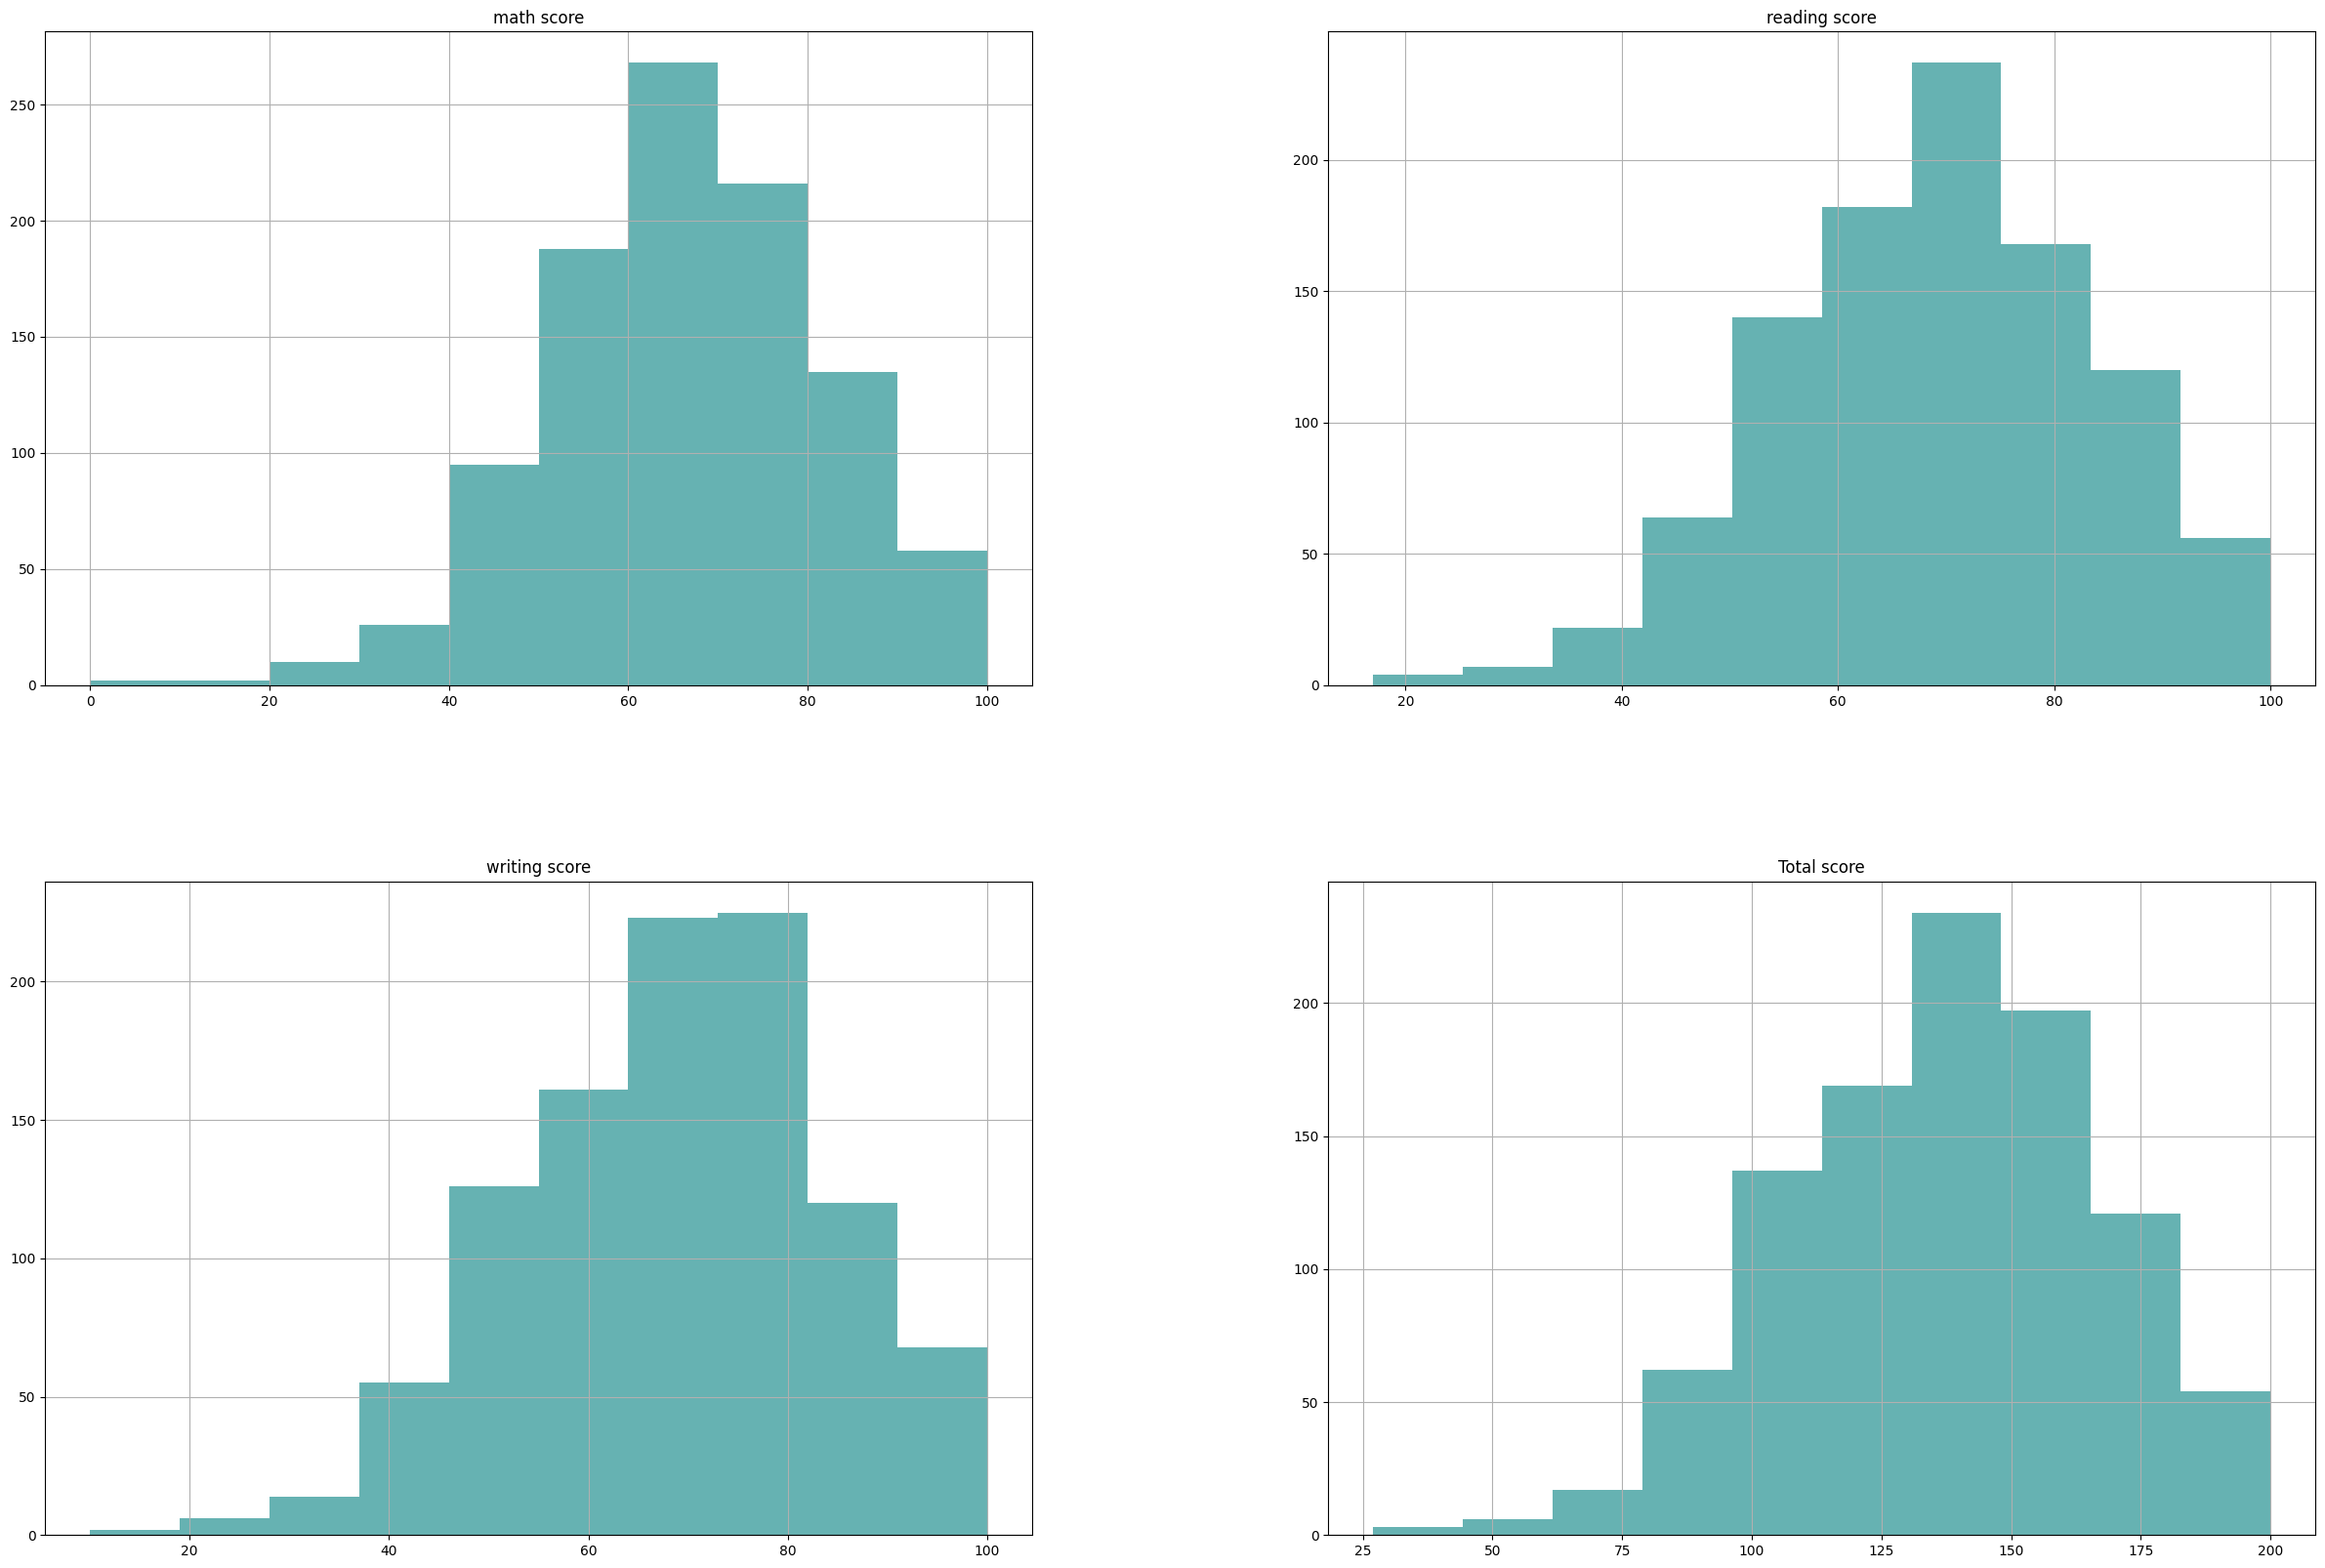

In [21]:
df.hist(figsize=(30,20),color='teal',alpha=0.6)
plt.show()

### outlier analysis

In [22]:
def identify_outliers(col_name):
    i=col_name
    # calculate quartiles
    Q1=round(np.quantile(df[i],0.25),2)
    Q2=round(np.quantile(df[i],0.50),2)
    Q3=round(np.quantile(df[i],0.75),2)
    # compute inter quartile range
    IQR=Q3-Q1
    # determine outlier bound
    upper_bound=Q3+(1.5*IQR)
    lower_bound=Q1-(1.5*IQR)
    # conditions to determine outlier
    cond1=df[i]>upper_bound
    cond2=df[i]<lower_bound
    # apply the conditions to find outlier
    outlier=df[i][cond1|cond2] #series
    # retrun dataframe with outlier
    outliers_data=outlier.values 
    return outliers_data

In [23]:
for i in df.columns:
    if df[i].dtypes=='int64':
        li=identify_outliers(i)
        print(i,"     ",len(li))
    else:
        continue

math score       8
reading score       6
writing score       5
Total score       6


<Axes: >

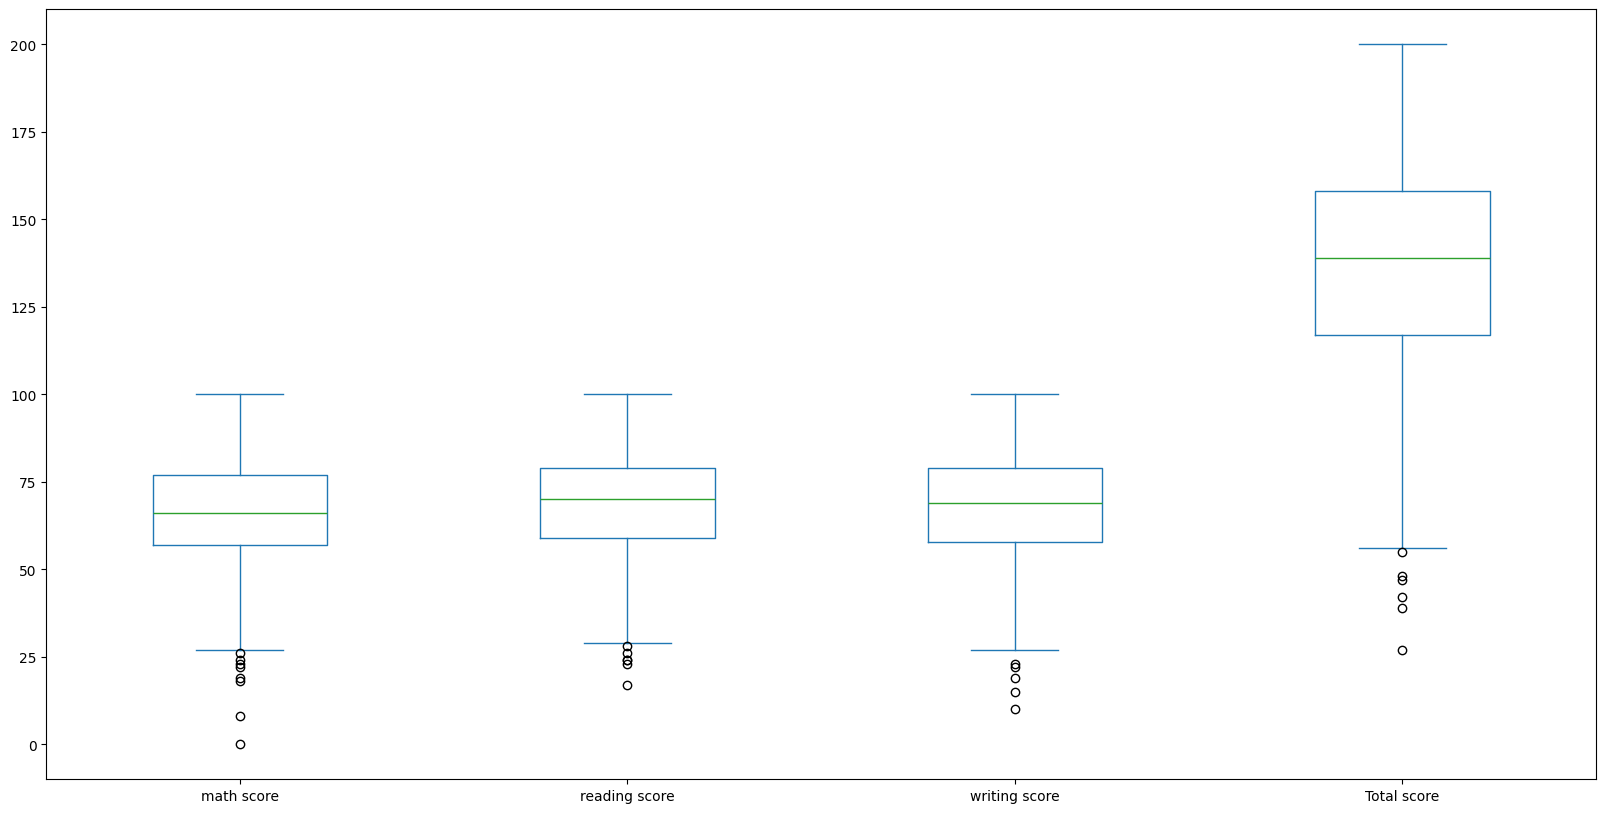

In [24]:
df.plot(kind='box', figsize=(20,10))

In [25]:
def detect_outlier(df,cols):
    for x in cols:
        q75,q25=np.percentile(df.loc[:,x],[75,25])
        intr_qr=q75-q25
        
        max_v =q75+(1.5*intr_qr)
        min_v =q25-(1.5*intr_qr)
        
        df.loc[df[x]<min_v,x]=np.nan
        df.loc[df[x]>max_v,x]=np.nan

In [26]:
numer=[]
cate=[]
for i in df.columns.values:
    # print(i)
    if df[i].dtypes!='object':
        numer.append(i)
    else:
        cate.append(i)

print(numer)
print(cate)

['math score', 'reading score', 'writing score', 'Total score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [27]:
outlier_drop=detect_outlier(df, numer)

In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  5
Total score                    6
dtype: int64

In [29]:
df.describe()

,math score,reading score,writing score,Total score
count,992.000000,994.000000,995.000000,994.000000
mean,66.480847,69.443662,68.306533,137.791751
std,14.559999,14.205560,14.804953,28.608760
min,27.000000,29.000000,27.000000,56.000000
25%,57.000000,60.000000,58.000000,118.000000
50%,66.000000,70.000000,69.000000,139.000000
75%,77.000000,79.750000,79.000000,158.000000
max,100.000000,100.000000,100.000000,200.000000


In [30]:
df['math score'].fillna(df['math score'].mean(), inplace=True)
df['reading score'].fillna(df['reading score'].mean(), inplace=True)
df['writing score'].fillna(df['writing score'].mean(), inplace=True)
df['Total score'].fillna(df['Total score'].mean(), inplace=True)

In [31]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total score                    0
dtype: int64

<Axes: >

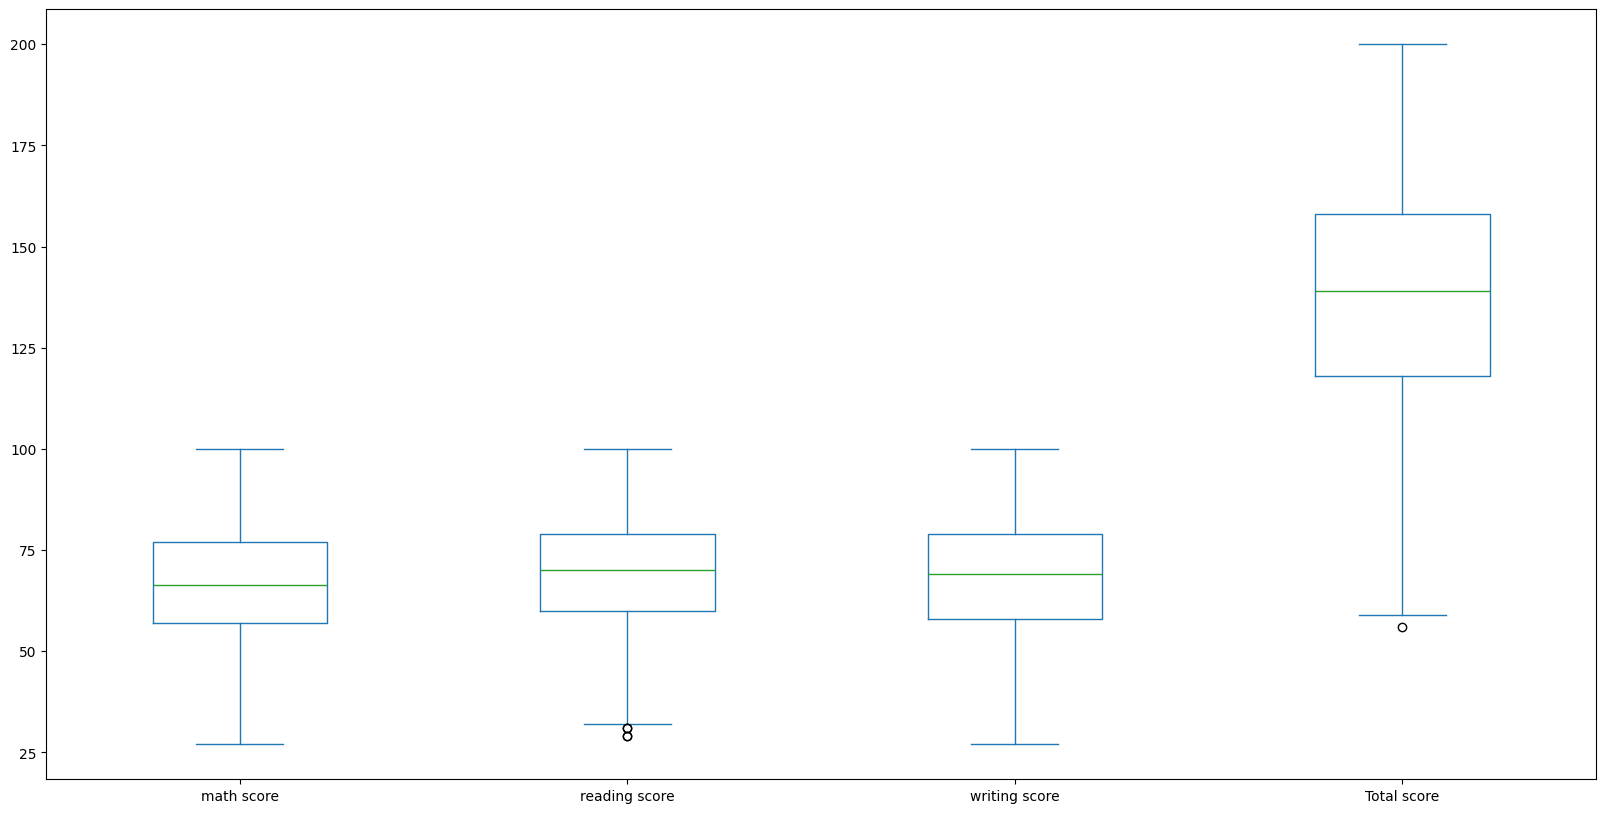

In [32]:
df.plot(kind='box', figsize=(20,10))

### label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
lb=LabelEncoder()

In [35]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
Total score                    float64
dtype: object

In [36]:
df['gender']=lb.fit_transform(df['gender'])
df['race/ethnicity']=lb.fit_transform(df['race/ethnicity'])
df['lunch']=lb.fit_transform(df['lunch'])
df['test preparation course']=lb.fit_transform(df['test preparation course'])
df['parental level of education']=lb.fit_transform(df['parental level of education'])

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,1,1,1,1,72.0,72.0,74.0,146.0
1,0,2,4,1,0,69.0,90.0,88.0,178.0
2,0,1,3,1,1,90.0,95.0,93.0,188.0
3,1,0,0,0,1,47.0,57.0,44.0,101.0
4,1,2,4,1,1,76.0,78.0,75.0,153.0


### change dtype

In [38]:
df.dtypes

gender                           int32
race/ethnicity                   int32
parental level of education      int32
lunch                            int32
test preparation course          int32
math score                     float64
reading score                  float64
writing score                  float64
Total score                    float64
dtype: object

In [39]:
df['math score']=df['math score'].astype('int32')
df['reading score']=df['reading score'].astype('int32')
df['writing score']=df['writing score'].astype('int32')
df['Total score']=df['Total score'].astype('int32')

In [40]:
df.dtypes

gender                         int32
race/ethnicity                 int32
parental level of education    int32
lunch                          int32
test preparation course        int32
math score                     int32
reading score                  int32
writing score                  int32
Total score                    int32
dtype: object

In [41]:
for i in df.columns.values:
    print(df[i].value_counts())

gender
0    518
1    482
Name: count, dtype: int64
race/ethnicity
2    319
3    262
1    190
4    140
0     89
Name: count, dtype: int64
parental level of education
4    226
0    222
2    196
5    179
1    118
3     59
Name: count, dtype: int64
lunch
1    645
0    355
Name: count, dtype: int64
test preparation course
1    642
0    358
Name: count, dtype: int64
math score
65    36
62    35
69    32
59    32
66    32
      ..
30     2
27     2
34     2
33     1
28     1
Name: count, Length: 73, dtype: int64
reading score
72    34
74    33
64    32
67    30
73    30
      ..
38     2
31     2
29     2
32     1
40     1
Name: count, Length: 67, dtype: int64
writing score
68    36
74    35
70    33
73    28
80    27
      ..
37     2
98     2
35     1
28     1
30     1
Name: count, Length: 72, dtype: int64
Total score
146    20
137    20
151    20
134    20
140    17
       ..
81      1
74      1
92      1
185     1
194     1
Name: count, Length: 132, dtype: int64


In [42]:
df.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.149822,-0.245651,-0.306287,-0.279068
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.210448,0.140984,0.161840,0.153582
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.057002,-0.062055,-0.076071,-0.069009
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.337574,0.217097,0.236479,0.228299
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.172006,-0.234897,-0.309313,-0.275713
math score,0.149822,0.210448,-0.057002,0.337574,-0.172006,1.000000,0.779530,0.763280,0.779143
reading score,-0.245651,0.140984,-0.062055,0.217097,-0.234897,0.779530,1.000000,0.948140,0.987408
writing score,-0.306287,0.161840,-0.076071,0.236479,-0.309313,0.763280,0.948140,1.000000,0.984528
Total score,-0.279068,0.153582,-0.069009,0.228299,-0.275713,0.779143,0.987408,0.984528,1.000000


Text(0.5, 1.0, 'Correlation Of Columns')

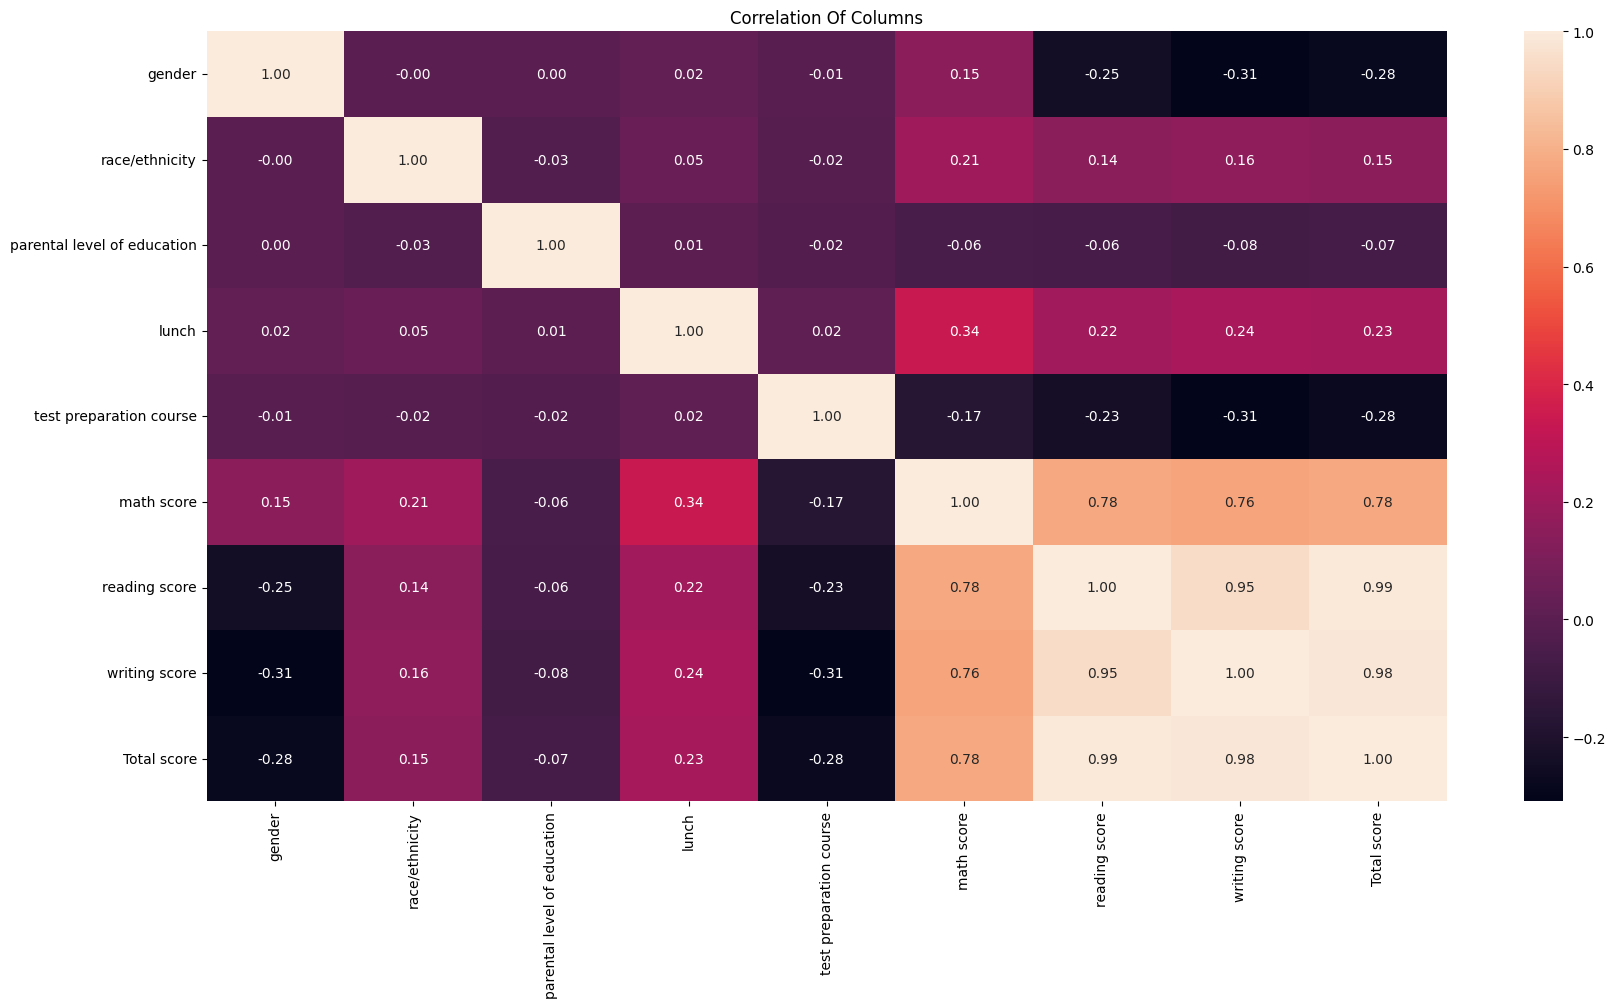

In [43]:
plt.figure(figsize=(20,10))
corr_columns=df.corr()
sns.heatmap(corr_columns, annot=True, fmt='.2f')
plt.title('Correlation Of Columns')

### divide data into input and output

In [44]:
# column_name='Total score'

In [45]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total score'],
      dtype='object')

In [46]:
X=df.drop(columns=['math score', 'Total score'])
y=df['math score']

In [47]:
scaler= StandardScaler()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [49]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Linear Regression

In [50]:
linear=LinearRegression()

In [51]:
X_train.shape, y_test.shape

((750, 7), (250,))

In [52]:
linear.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=linear.predict(X_test)

In [54]:
y_pred.shape

(250,)

#### metrics of linear regression

In [55]:
linear.score(X_test, y_test)

0.742604895827965

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('mean abs error',mean_absolute_error(y_test,y_pred))
print('mena sqr error',mean_squared_error(y_test,y_pred))
print('rmse is',np.sqrt(mean_squared_error(y_test,y_pred)))

mean abs error 4.917918016960482
mena sqr error 49.40136461842533
rmse is 7.028610432967909


In [57]:
from sklearn.tree import DecisionTreeRegressor
classifier=DecisionTreeRegressor()
classifier.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [58]:
classifier.score(X_test_scaled, y_pred)

0.6351377080346157

In [59]:
y_pred = classifier.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

MAE: 7.092
MSE: 86.54


### random Froest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_tree=RandomForestRegressor()
rf_tree.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [61]:
rf_tree.score(X_test_scaled, y_pred)

0.8112928292374859

In [62]:
y_pred = rf_tree.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

MAE: 5.149718666666667
MSE: 43.58840630088889


### saving the file

In [63]:
import pickle

In [64]:
with open('math_model.pkl', 'wb') as model_file:
    pickle.dump(rf_tree, model_file)

with open('math_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### code fro prediction

In [65]:
import pickle 
import numpy as np

In [66]:
with open('math_model.pkl', 'rb') as model_file:
    model=pickle.load(model_file)

with open('math_scaler.pkl', 'rb') as scaler_file:
    scaler=pickle.load(scaler_file)

In [67]:
new_dp=[0,1,1,1,1,72,74]

In [68]:
scaled_dp=scaler.transform([new_dp])

C:\Users\91876\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
scaled_dp

array([[-0.95055421, -1.02277281, -0.82058127,  0.76745231,  0.73272454,
         0.18928146,  0.38500872]])

In [70]:
prediction=model.predict(scaled_dp)

In [72]:
prediction[0]

69.83